# Import libraries

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Understanding the data

In [19]:
# Read the file
df = pd.read_csv('housing.csv')

# --------------------- UNDERSTANDING -----------------------

# Verify the info of the data
print('Información del Dataset')
print(df.info())

# Description of the data
print('Descripción del Dataset')
print(df.describe())

# Verify missing values in the data
print('Missing Values')
print(df.isnull().sum())

Información del Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None
Descripción del Dataset
          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   

All the features are type float64 except the 'ocean_proximity' which is type object, besides, only the column 'total_bedrooms' has missing values

In [20]:
# Verify the data
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

# Data Cleaning

In this section, i will clean up all the data, for instance, replace the missing values in the total_bedrooms columns with the median value in this column. Also, all features that are in different value ranges need to be scaled, so I will scale them in the same value range.

In [21]:
# Replace the missing values for the median of total rooms

# Average of total bedrooms
avg_bed = round(df['total_bedrooms'].mean())

# Replace the missing values for the avg
df['total_bedrooms'].replace(np.nan,avg_bed,inplace=True)

In [22]:
# Save the processed data
df.to_csv('processed_data.csv',index=False)

# EDA

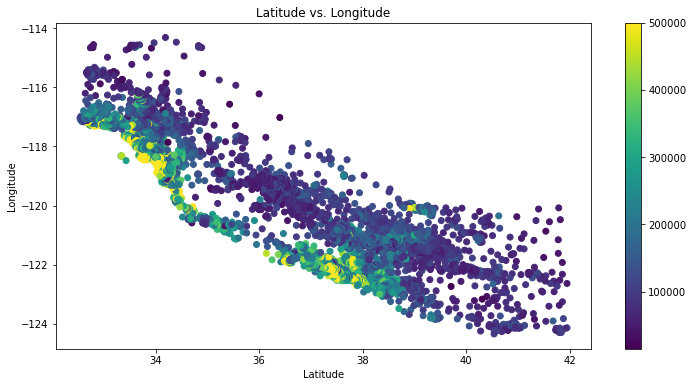

In [23]:
# Plot the scatter of the longitude and latitude
plt.figure(figsize=(12,6))
plt.scatter(df['latitude'], df['longitude'],c=df['median_house_value'],cmap='viridis')
plt.colorbar()
plt.title('Latitude vs. Longitude')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

Plot scatter of features such as total bedrooms, total rooms, households adn housing_median_age with the house value

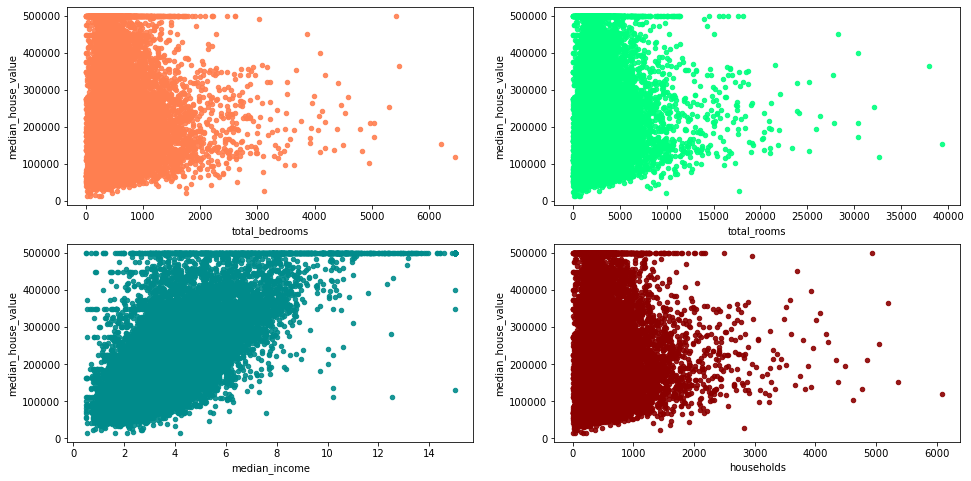

In [24]:
# Some scatter of differente features with the house value
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax2 = fig.add_subplot(2, 2, 2) # add subplot 2 (1 row, 2 columns, second plot)
ax3 = fig.add_subplot(2, 2, 3) # add subplot 1 (1 row, 2 columns, third plot)
ax4 = fig.add_subplot(2, 2, 4) # add subplot 2 (1 row, 2 columns, fourth plot)
ax = [ax1, ax2, ax3, ax4]
y=['median_house_value']
x=['total_bedrooms','total_rooms','median_income','households']
colors=['coral','springgreen','darkcyan','darkred']
for i in range(len(x)):
    df.plot(x=x[i], y=y,kind='scatter',figsize=(16, 8),color=colors[i],ax=ax[i],alpha=0.9)
    ax[i].set_xlabel(str(x[i]))
    ax[i].set_ylabel(str(y[0]))
plt.show()

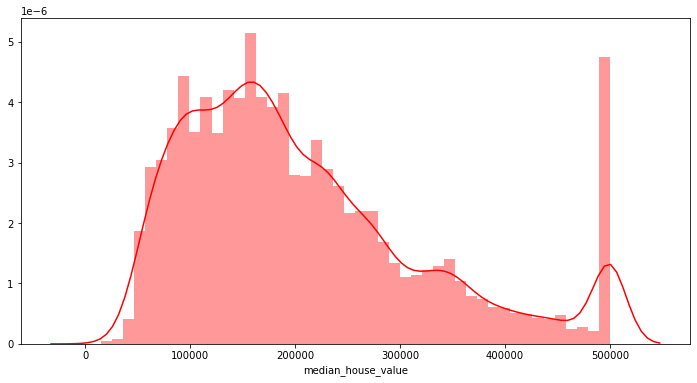

In [25]:
# PLot the distribution of the median house values
plt.figure(figsize=(12,6))
sns.distplot(df['median_house_value'], color='red')
plt.show()

There is an area where the median house value in 500000 could be a outlier or some noise in the data

In [26]:
# Remove the outlier in the median house value
df[df['median_house_value']>450000]['median_house_value'].value_counts().head()

500001.0    965
500000.0     27
475000.0      8
483300.0      6
466700.0      4
Name: median_house_value, dtype: int64

In [27]:
df=df.loc[df['median_house_value']<500001,:]

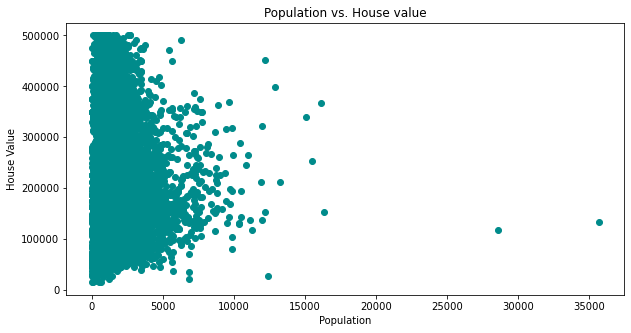

In [28]:
# Plot the scatter between the population and the median house value
plt.figure(figsize=(10,5))
plt.scatter(df['population'], df['median_house_value'],color='darkcyan')
plt.title('Population vs. House value')
plt.xlabel('Population')
plt.ylabel('House Value')
plt.show()

There are 2 outliers in the scatter plot, these values correspond in population > 26000

In [29]:
# Remove the outliers in the population
df=df[df['population']<27000]

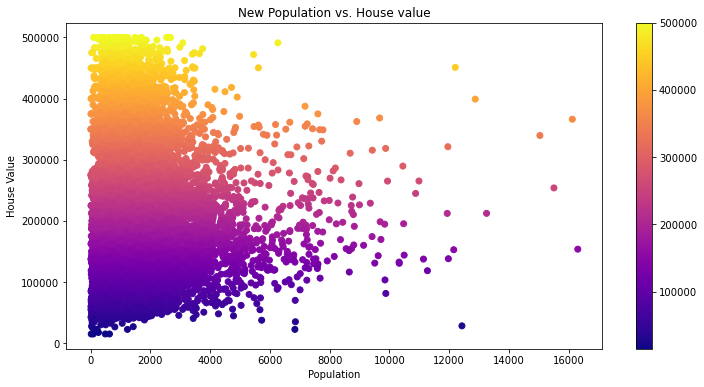

In [30]:
# Plot the new scatter between the population and the median house value
plt.figure(figsize=(12,6))
plt.scatter(df['population'], df['median_house_value'],c=df['median_house_value'], cmap='plasma')
plt.colorbar()
plt.title('New Population vs. House value')
plt.xlabel('Population')
plt.ylabel('House Value')
plt.show()

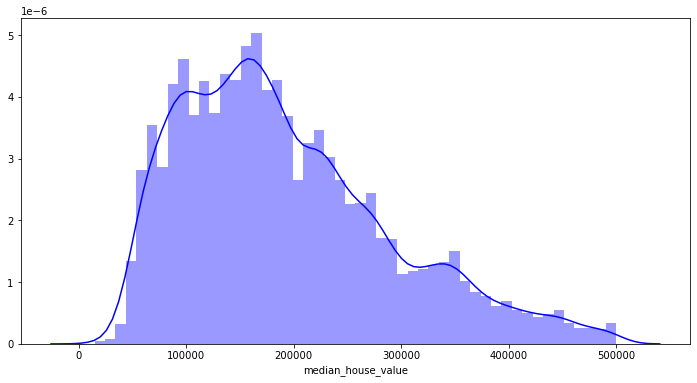

In [31]:
# PLot the new distribution of the median house values
plt.figure(figsize=(12,6))
sns.distplot(df['median_house_value'], color='blue')
plt.show()

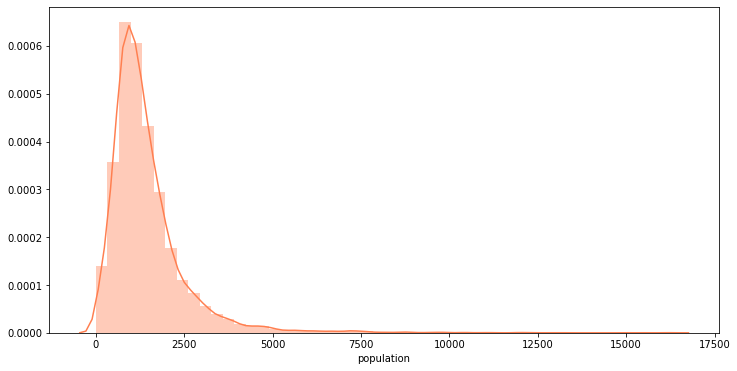

In [32]:
# PLot the distribution of the population
plt.figure(figsize=(12,6))
sns.distplot(df['population'], color='coral')
plt.show()

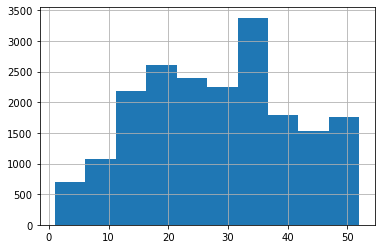

In [33]:
# Histogram of the housing median age
df.housing_median_age.hist()

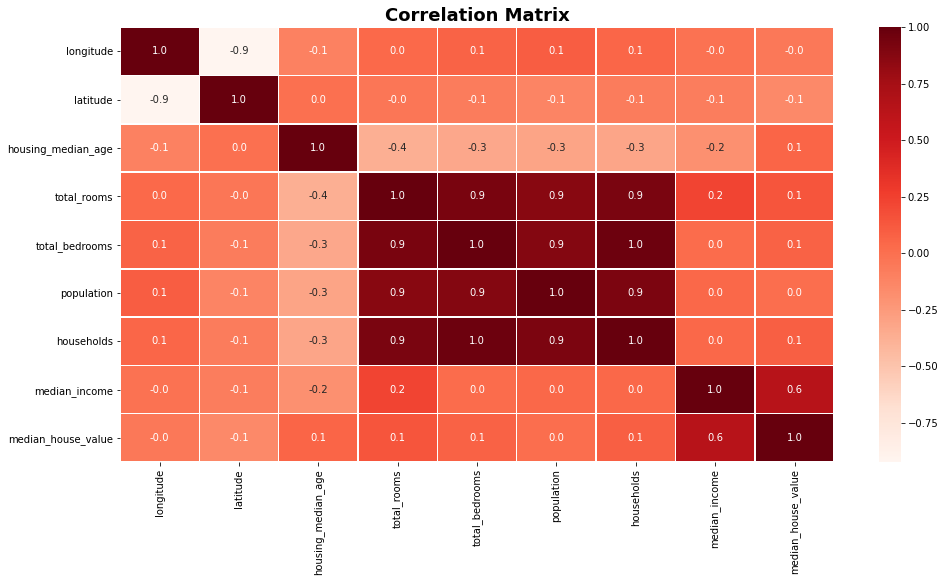

In [34]:
# Plot the correlation matrix between features with the median house value
plt.figure(figsize=(16,8))
s=sns.heatmap(df.corr(), annot=True, linewidth='.5', fmt='.1f', cmap=plt.cm.Reds)
plt.title('Correlation Matrix', weight='bold', fontsize=18)
plt.show()

The most influyent feature in the house value is the median income with a 0.6 

In [35]:
# Pivot table to show the number of houses acording to the ocean proximity
pd.pivot_table(df, index='ocean_proximity', values='median_house_value',aggfunc='count').sort_values('median_house_value', ascending=False)

median_house_value
ocean_proximity                    
<1H OCEAN                      8602
INLAND                         6524
NEAR OCEAN                     2446
NEAR BAY                       2096
ISLAND                            5

[]

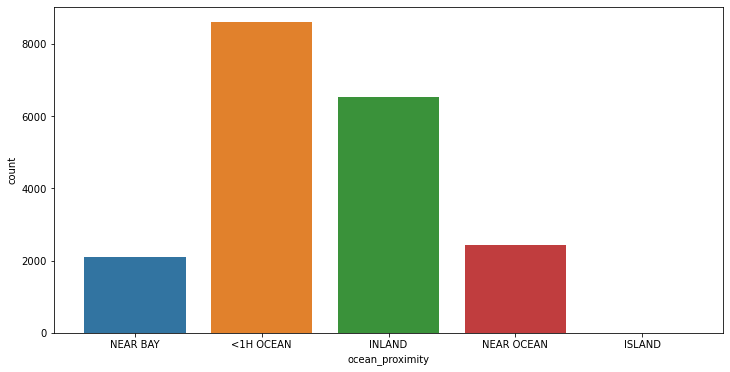

In [36]:
# Another option is plotting this pivot table
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='ocean_proximity')
plt.plot()

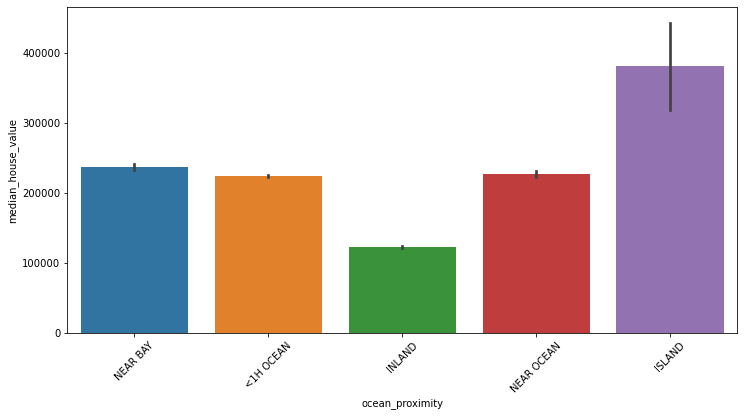

In [37]:
# Plot bar of the ocean proximity and the median house value
plt.figure(figsize=(12,6))
chart=sns.barplot(x=df['ocean_proximity'], y=df['median_house_value'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

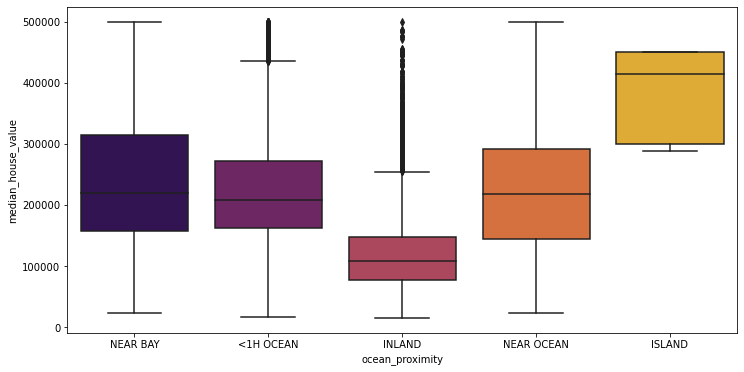

In [38]:
# Boxplot of the median house value and ocean proximity
plt.figure(figsize=(12,6))
sns.boxplot(data=df,x='ocean_proximity',y='median_house_value', palette='inferno')
plt.show()

In [39]:
# Create different groups of ages
bins=[0,10,20,30,40,60] 
Names=['New','Barely New','Normal','Old','Super Old']
df['age_ranges'] = pd.cut(df['housing_median_age'], bins=bins, labels=Names)

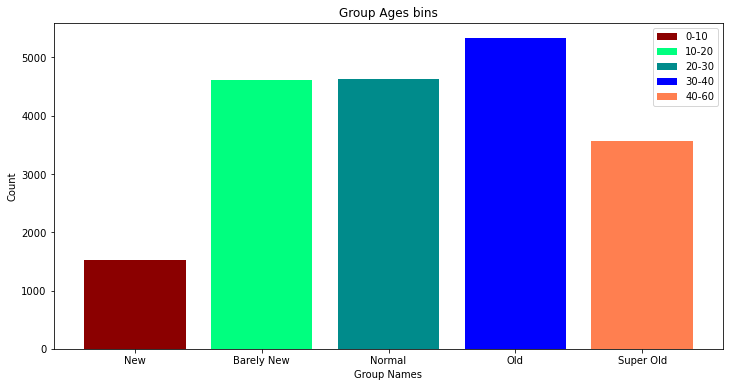

In [40]:
# Plot the numer of houses each age group
fig, ax =plt.subplots()
fig.set_size_inches((12,6))
colors=['darkred','springgreen','darkcyan','b','coral']
nam=['0-10','10-20','20-30','30-40','40-60','60-100']
for i in range(len(Names)):
    plt.bar(Names[i],df['age_ranges'][df['age_ranges']==Names[i]].value_counts(),color=colors[i],label=nam[i])

plt.xlabel('Group Names')
plt.ylabel('Count')
plt.title('Group Ages bins')
plt.legend()
plt.show()

# Processing the data

In [41]:
# Convert the ocean proximity to dummies
df_dum = pd.get_dummies(df['ocean_proximity'])
# Vreify the new columns
df_dum.head()

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          0       0       0         1           0
1          0       0       0         1           0
2          0       0       0         1           0
3          0       0       0         1           0
4          0       0       0         1           0

In [42]:
# Concatenate the dummies table with the data
df=pd.concat([df_dum,df],axis=1).drop('ocean_proximity',axis=1)
df.head()

<1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN  longitude  latitude  \
0          0       0       0         1           0    -122.23     37.88   
1          0       0       0         1           0    -122.22     37.86   
2          0       0       0         1           0    -122.24     37.85   
3          0       0       0         1           0    -122.25     37.85   
4          0       0       0         1           0    -122.25     37.85   

   housing_median_age  total_rooms  total_bedrooms  population  households  \
0                41.0        880.0           129.0       322.0       126.0   
1                21.0       7099.0          1106.0      2401.0      1138.0   
2                52.0       1467.0           190.0       496.0       177.0   
3                52.0       1274.0           235.0       558.0       219.0   
4                52.0       1627.0           280.0       565.0       259.0   

   median_income  median_house_value age_ranges  
0         8.3252            452600.0  Super Old  
1         8.3014            358500.0     Normal  
2         7.2574            352100.0  Super Old  
3         5.6431            341300.0  Super Old  
4         3.8462            342200.0  Super Old

In [43]:
# Save the processed data
df.to_csv('processed_Data')

Select the independent variable and the dependent variable in the dataset

In [44]:
df_model = df.drop('age_ranges',axis=1)
# Select the variable x and y
x = np.array(df_model.drop('median_house_value', axis=1))
y = np.array(df_model['median_house_value'])

# Model Building

Training and Testing sampling

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [46]:
# Normalize the variables de train y test
ms=MinMaxScaler()
x_train = ms.fit_transform(x_train)
x_test = ms.fit_transform(x_test)

In [47]:
# Linear Regression
lr = LinearRegression()
lr.fit(x_train, y_train)
cv_reg=cross_val_score(lr,x_train,y_train,cv=10)
print('Cross Vall score LR', str(cv_reg.mean()*100))
print('La precisión de LR : ', lr.score(x_train,y_train))

Cross Vall score LR 61.222209939310005
La precisión de LR :  0.6137983885452865


In [48]:
# Linear Regression
reg_poly = PolynomialFeatures(degree=3)
x_train_poli = reg_poly.fit_transform(x_train)
lr_poli = LinearRegression()
lr_poli.fit(x_train_poli, y_train)
cv_poli=cross_val_score(lr_poli,x_train,y_train,cv=10)
print('Cross Vall score LR Poly', str(cv_reg.mean()*100))
print('La precisión de LR Poly : ', lr_poli.score(x_train_poli,y_train))

Cross Vall score LR Poly 61.222209939310005
La precisión de LR Poly :  0.7420560461007557


In [49]:
# Random Forest
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
cv_rf=cross_val_score(rf,x_train,y_train,cv=10)
print('Cross Vall score RF', str(cv_rf.mean()*100))
print('La precisión de RF es : ', rf.score(x_train,y_train))

Cross Vall score RF 78.60406522564516
La precisión de RF es :  0.9703966641600132


In [50]:
# KNN
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)
cv_knn=cross_val_score(knn,x_train,y_train,cv=10)
print('Cross Vall score RF', str(cv_knn.mean()*100))
print('La precisión de KNN es : ', knn.score(x_train,y_train))

Cross Vall score RF 67.9345785262128
La precisión de KNN es :  0.7940297740291634


The model with the best performance with the training set is the Random Forest, now in order to improve this performance i will tune the model using the Grid Search CV

# Model Tunning

In [51]:
# Parameters for the grid search method
# The parameters are the simpliest, this is because of the computational cost
parameters = {'n_estimators':range(1,6,1), 'max_depth':range(1,10,1)}

# Random Forest
clf = GridSearchCV(rf, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': range(1, 6)})

In [52]:
# Verify the best params of the model
clf.best_params_

{'max_depth': 9, 'n_estimators': 5}

In [53]:
# Random Forest
rf = RandomForestRegressor(max_depth= 9, n_estimators= 5)
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)

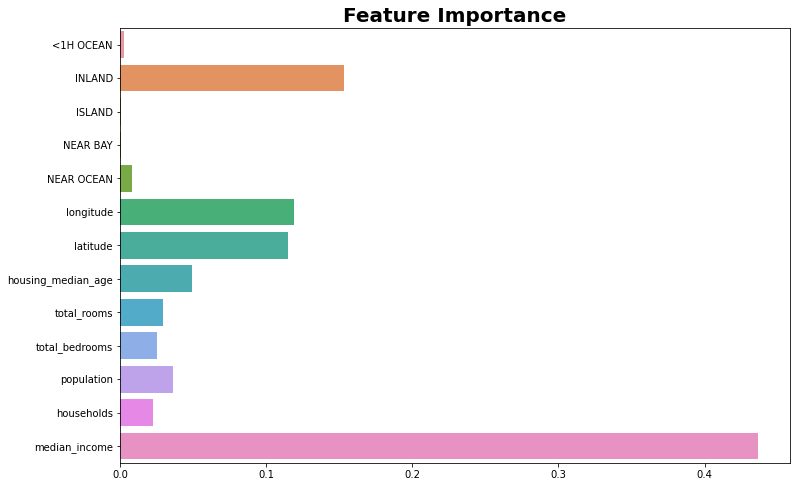

In [54]:
# Best Features by Random Forest
plt.figure(figsize=(12,8))
plt.title('Feature Importance',weight='bold',fontsize=20)
sns.barplot(data={'importance':rf.feature_importances_,'feature':df_model.columns[df_model.columns!='median_house_value']},y='feature',x='importance')
plt.show()

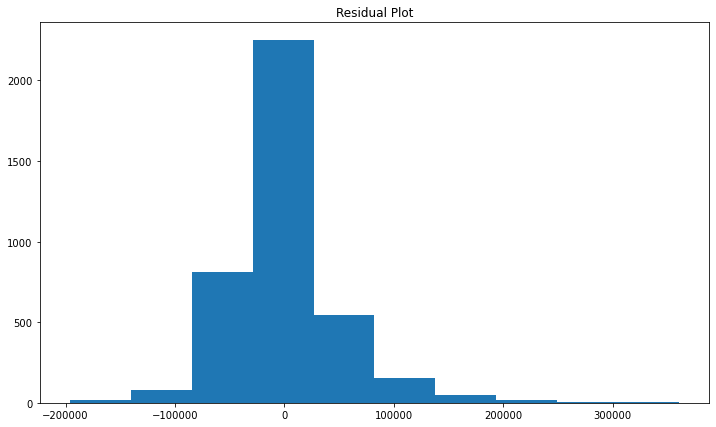

In [55]:
# Residual Plot
plt.figure(figsize=(12,7))
plt.title('Residual Plot')
plt.hist(y_test-rf.predict(x_test))
plt.show()

In [56]:
# R squared 
rf.score(x_test,y_test)

0.7428103116770699

The performance of the model with the testing data is no the best, however, this could improve if the number of estimators and the max depth of the trees is higher, in fact, if tunning the model with more parameters probably you'll get a better model than this.